<h1 align="center"> HW Assignment 11- Data Competition</h1>
<h3 align="center"> k-Nearest-Neighbors (k-NN), Naive Bayes, Decision Trees, Random Forests, SVC, and NN MLP</h3>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python </h3>
<h3 align="center"> By: Austin Funcheon and Viraj Rane </h3>

The contributions of each member is noted at every section of this notebook.

## 1. Data

### 1.1 Import Data

Contribution: Austin, Viraj

Import train_data.csv file as training data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.utils import class_weight

In [2]:
data = pd.read_csv('train_data.csv')
data.sample(10).transpose()

2394   134    1756    2199    108      518   \
word_freq_make               1.070   0.00   0.00   0.000   0.400    0.000   
word_freq_address            0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_all                1.070   0.00   0.00   0.000   0.810    0.310   
word_freq_3d                 0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_our                1.070   0.00   0.00   0.000   0.000    1.040   
word_freq_over               1.070   0.00   0.00   0.000   0.400    0.100   
word_freq_remove             0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_internet           0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_order              0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_mail               0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_receive            0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_will               0.000   0.00   0.00   3.840   0.810    0.100   
word_freq_people             0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_report             0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_addresses          0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_free               0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_business           0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_email              0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_you                0.000   0.00   0.00   0.000   1.630    0.200   
word_freq_credit             0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_your               0.000   0.00   0.00   0.000   0.400    0.000   
word_freq_font               0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_000                0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_money              0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_hp                 1.070   0.00   0.00   0.000   0.000    0.410   
word_freq_hpl                0.000   0.00   0.00   0.000   0.000    0.200   
word_freq_george             1.070   0.00  14.28   0.000   0.810    0.520   
word_freq_650                0.000   0.00   0.00   0.000   0.000    0.200   
word_freq_lab                0.000   0.00   0.00   0.000   0.000    0.200   
word_freq_labs               1.070   0.00   0.00   0.000   0.400    0.200   
word_freq_telnet             0.000   0.00   0.00   0.000   0.000    0.200   
word_freq_857                1.070   0.00   0.00   0.000   0.000    0.200   
word_freq_data               0.000   0.00   0.00   0.000   0.000    0.410   
word_freq_415                1.070   0.00   0.00   0.000   0.000    0.200   
word_freq_85                 0.000   0.00   0.00   0.000   0.000    0.200   
word_freq_technology         0.000   0.00   0.00   0.000   0.000    0.200   
word_freq_1999               0.000   0.00   0.00   0.000   0.000    0.100   
word_freq_parts              0.000   0.00   0.00   0.000   0.000    1.570   
word_freq_pm                 0.000   0.00   0.00   0.000   0.000    0.100   
word_freq_direct             0.000   0.00   0.00   0.000   0.000    0.200   
word_freq_cs                 0.000   7.14   0.00   0.000   0.000    0.000   
word_freq_meeting            0.000   0.00   0.00   0.000   0.000    0.410   
word_freq_original           0.000   0.00   0.00   0.000   0.400    0.100   
word_freq_project            0.000   0.00   0.00   0.000   0.000    0.100   
word_freq_re                 0.000   0.00   0.00   0.000   0.400    0.100   
word_freq_edu                0.000   7.14   0.00   0.000   0.000    0.000   
word_freq_table              0.000   0.00   0.00   0.000   0.000    0.000   
word_freq_conference         0.000   0.00   0.00   0.000   0.000    0.100   
char_freq_;                  0.000   0.00   0.00   0.000   0.000    0.067   
char_freq_(                  0.370   0.00   0.00   0.709   0.071    0.523   
char_freq_[                  0.000   0.00   0.00   0.000   0.000    0.016   
char_freq_!               

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

In [4]:
# Summarizing data
data.describe()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     3220.000000        3220.000000    3220.000000   3220.000000   
mean         0.099854           0.219792       0.284391      0.041627   
std          0.285808           1.329902       0.504691      1.010729   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.430000      0.000000   
max          4.340000          14.280000       4.540000     40.130000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    3220.000000     3220.000000       3220.000000         3220.000000   
mean        0.306783        0.100839          0.112981            0.108127   
std         0.654040        0.289473          0.402128            0.414894   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.370000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
count      3220.000000     3220.000000  ...  3220.000000  3220.000000   
mean          0.087357        0.239550  ...     0.039989     0.140453   
std           0.255191        0.661345  ...     0.251293     0.293065   
min           0.000000        0.000000  ...     0.000000     0.000000   
25%           0.000000        0.000000  ...     0.000000     0.000000   
50%           0.000000        0.000000  ...     0.000000     0.065000   
75%           0.000000        0.150000  ...     0.000000     0.184000   
max           2.590000       18.180000  ...     4.385000     9.752000   

       char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
count  3220.000000  3220.000000  3220.000000  3220.000000   
mean      0.016707     0.268132     0.072931     0.048461   
std       0.111976     0.811123     0.223694     0.501323   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.326250     0.051000     0.000000   
max       4.081000    32.478000     5.300000    19.829000   

       capital_run_length_average  capital_run_length_longest  \
count                 3220.000000                 3220.000000   
mean                     5.213943                   53.550311   
std                     33.335451                  219.385696   
min                      1.000000                    1.000000   
25%                      1.571000                    6.000000   
50%                      2.250000                   15.000000   
75%                      3.690250                   42.000000   
max                   1102.500000                 9989.000000   

       capital_run_length_total        class  
count               3220.000000  3220.000000  
mean                 285.312112     0.394099  
std                  621.036731     0.488732  
min                    1.000000     0.000000  
25%                   35.000000     0.000000  
50%                   95.500000     0.000000  
75%                  264.250000     1.000000  
max                15841.000000     1.000000  

[8 rows x 58 columns]

## 2. Data Preprocessing

Contribution: Austin, Viraj

In [5]:
data['class'].value_counts()

0    1951
1    1269
Name: class, dtype: int64

In [6]:
# defining the outcome variable 'y' and predictors 'X'
y = data['class']
X = data.drop(columns='class')

In [7]:
X.describe()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     3220.000000        3220.000000    3220.000000   3220.000000   
mean         0.099854           0.219792       0.284391      0.041627   
std          0.285808           1.329902       0.504691      1.010729   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.430000      0.000000   
max          4.340000          14.280000       4.540000     40.130000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    3220.000000     3220.000000       3220.000000         3220.000000   
mean        0.306783        0.100839          0.112981            0.108127   
std         0.654040        0.289473          0.402128            0.414894   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.370000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  ...  word_freq_conference  \
count      3220.000000     3220.000000  ...           3220.000000   
mean          0.087357        0.239550  ...              0.035149   
std           0.255191        0.661345  ...              0.313863   
min           0.000000        0.000000  ...              0.000000   
25%           0.000000        0.000000  ...              0.000000   
50%           0.000000        0.000000  ...              0.000000   
75%           0.000000        0.150000  ...              0.000000   
max           2.590000       18.180000  ...             10.000000   

       char_freq_;  char_freq_(  char_freq_[  char_freq_!  char_freq_$  \
count  3220.000000  3220.000000  3220.000000  3220.000000  3220.000000   
mean      0.039989     0.140453     0.016707     0.268132     0.072931   
std       0.251293     0.293065     0.111976     0.811123     0.223694   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.065000     0.000000     0.000000     0.000000   
75%       0.000000     0.184000     0.000000     0.326250     0.051000   
max       4.385000     9.752000     4.081000    32.478000     5.300000   

       char_freq_#  capital_run_length_average  capital_run_length_longest  \
count  3220.000000                 3220.000000                 3220.000000   
mean      0.048461                    5.213943                   53.550311   
std       0.501323                   33.335451                  219.385696   
min       0.000000                    1.000000                    1.000000   
25%       0.000000                    1.571000                    6.000000   
50%       0.000000                    2.250000                   15.000000   
75%       0.000000                    3.690250                   42.000000   
max      19.829000                 1102.500000                 9989.000000   

       capital_run_length_total  
count               3220.000000  
mean                 285.312112  
std                  621.036731  
min                    1.000000  
25%                   35.000000  
50%                   95.500000  
75%                  264.250000  
max                15841.000000  

[8 rows x 57 columns]

In [8]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: class, dtype: int64

## 3. Data Partition

Contribution: Viraj

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_y, test_y, train_X, test_X = train_test_split(y, X, test_size= 0.2, random_state= 123)

In [11]:
train_X.shape

(2576, 57)

In [12]:
train_y.shape

(2576,)

In [13]:
test_X.shape

(644, 57)

In [14]:
test_y.shape

(644,)

## 4. Data Transformation 

## Normalize data

Contribution: Austin

In [15]:
# Create a scaler to do the transformation
scaler = preprocessing.MinMaxScaler().fit(train_X)

In [16]:
# Transform training X
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

train_X_scale.describe().transpose()

count      mean       std  min       25%  \
word_freq_make              2576.0  0.023446  0.066123  0.0  0.000000   
word_freq_address           2576.0  0.016816  0.099738  0.0  0.000000   
word_freq_all               2576.0  0.063553  0.113039  0.0  0.000000   
word_freq_3d                2576.0  0.000877  0.021868  0.0  0.000000   
word_freq_our               2576.0  0.043815  0.092171  0.0  0.000000   
word_freq_over              2576.0  0.028196  0.076134  0.0  0.000000   
word_freq_remove            2576.0  0.015987  0.057474  0.0  0.000000   
word_freq_internet          2576.0  0.021810  0.074126  0.0  0.000000   
word_freq_order             2576.0  0.036011  0.102997  0.0  0.000000   
word_freq_mail              2576.0  0.013506  0.037114  0.0  0.000000   
word_freq_receive           2576.0  0.023453  0.077800  0.0  0.000000   
word_freq_will              2576.0  0.085991  0.134371  0.0  0.000000   
word_freq_people            2576.0  0.016939  0.051083  0.0  0.000000   
word_freq_report            2576.0  0.012574  0.065122  0.0  0.000000   
word_freq_addresses         2576.0  0.011476  0.060796  0.0  0.000000   
word_freq_free              2576.0  0.015229  0.046671  0.0  0.000000   
word_freq_business          2576.0  0.028169  0.087283  0.0  0.000000   
word_freq_email             2576.0  0.024439  0.068900  0.0  0.000000   
word_freq_you               2576.0  0.116778  0.123729  0.0  0.000000   
word_freq_credit            2576.0  0.005055  0.031369  0.0  0.000000   
word_freq_your              2576.0  0.092541  0.135287  0.0  0.000000   
word_freq_font              2576.0  0.008218  0.072490  0.0  0.000000   
word_freq_000               2576.0  0.020813  0.070751  0.0  0.000000   
word_freq_money             2576.0  0.009809  0.043542  0.0  0.000000   
word_freq_hp                2576.0  0.026475  0.084599  0.0  0.000000   
word_freq_hpl               2576.0  0.027370  0.089781  0.0  0.000000   
word_freq_george            2576.0  0.024414  0.104121  0.0  0.000000   
word_freq_650               2576.0  0.014650  0.062580  0.0  0.000000   
word_freq_lab               2576.0  0.008691  0.049085  0.0  0.000000   
word_freq_labs              2576.0  0.021135  0.094104  0.0  0.000000   
word_freq_telnet            2576.0  0.012853  0.074891  0.0  0.000000   
word_freq_857               2576.0  0.010418  0.071836  0.0  0.000000   
word_freq_data              2576.0  0.005430  0.033102  0.0  0.000000   
word_freq_415               2576.0  0.010631  0.072079  0.0  0.000000   
word_freq_85                2576.0  0.005237  0.028984  0.0  0.000000   
word_freq_technology        2576.0  0.012794  0.053920  0.0  0.000000   
word_freq_1999              2576.0  0.019698  0.062238  0.0  0.000000   
word_freq_parts             2576.0  0.002228  0.032325  0.0  0.000000   
word_freq_pm                2576.0  0.007846  0.043663  0.0  0.000000   
word_freq_direct            2576.0  0.013614  0.074635  0.0  0.000000   
word_freq_cs                2576.0  0.005189  0.046183  0.0  0.000000   
word_freq_meeting           2576.0  0.008158  0.048292  0.0  0.000000   
word_freq_original          2576.0  0.012871  0.063670  0.0  0.000000   
word_freq_project           2576.0  0.004371  0.037245  0.0  0.000000   
word_freq_re                2576.0  0.014063  0.049553  0.0  0.000000   
word_freq_edu               2576.0  0.012113  0.059120  0.0  0.000000   
word_freq_table             2576.0  0.002509  0.035670  0.0  0.000000   
word_freq_conference        2576.0  0.003495  0.029621  0.0  0.000000   
char_freq_;                 2576.0  0.009153  0.058242  0.0  0.000000   
char_freq_(                 2576.0  0.014514  0.031086  0.0  0.000000   
char_freq_[                 2576.0  0.005663  0.032976  0.0  0.000000   
char_freq_!                 2576.0  0.008364  0.026591  0.0  0.000000   
char_freq_$                 2576.0  0.014135  0.041997  0.0  0.000000   
char_freq_#                 2576.0  0.002547  0.027000  0.0  0.000000   
capital_run_le

In [17]:
#from sklearn.utils import class_weights
sample = class_weight.compute_sample_weight('balanced', train_y)
#sample weighted, as needed for class.

In [18]:
# Transform test X
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

test_X_scale.describe().transpose()

count      mean       std  min       25%  \
word_freq_make              644.0  0.021256  0.064790  0.0  0.000000   
word_freq_address           644.0  0.009695  0.059518  0.0  0.000000   
word_freq_all               644.0  0.058996  0.103336  0.0  0.000000   
word_freq_3d                644.0  0.001677  0.035498  0.0  0.000000   
word_freq_our               644.0  0.039572  0.089282  0.0  0.000000   
word_freq_over              644.0  0.033782  0.110508  0.0  0.000000   
word_freq_remove            644.0  0.013755  0.045654  0.0  0.000000   
word_freq_internet          644.0  0.028279  0.131557  0.0  0.000000   
word_freq_order             644.0  0.030671  0.098270  0.0  0.000000   
word_freq_mail              644.0  0.011860  0.033266  0.0  0.000000   
word_freq_receive           644.0  0.021531  0.073406  0.0  0.000000   
word_freq_will              644.0  0.083871  0.127632  0.0  0.000000   
word_freq_people            644.0  0.017665  0.062891  0.0  0.000000   
word_freq_report            644.0  0.008415  0.044477  0.0  0.000000   
word_freq_addresses         644.0  0.009324  0.051991  0.0  0.000000   
word_freq_free              644.0  0.013751  0.057449  0.0  0.000000   
word_freq_business          644.0  0.027735  0.086118  0.0  0.000000   
word_freq_email             644.0  0.022987  0.073090  0.0  0.000000   
word_freq_you               644.0  0.114328  0.126793  0.0  0.000000   
word_freq_credit            644.0  0.004538  0.024642  0.0  0.000000   
word_freq_your              644.0  0.093393  0.139257  0.0  0.000000   
word_freq_font              644.0  0.009239  0.079095  0.0  0.000000   
word_freq_000               644.0  0.018774  0.073421  0.0  0.000000   
word_freq_money             644.0  0.006571  0.019953  0.0  0.000000   
word_freq_hp                644.0  0.030373  0.087933  0.0  0.000000   
word_freq_hpl               644.0  0.032475  0.119887  0.0  0.000000   
word_freq_george            644.0  0.025051  0.107137  0.0  0.000000   
word_freq_650               644.0  0.015502  0.069231  0.0  0.000000   
word_freq_lab               644.0  0.009944  0.069289  0.0  0.000000   
word_freq_labs              644.0  0.023295  0.097276  0.0  0.000000   
word_freq_telnet            644.0  0.012507  0.066961  0.0  0.000000   
word_freq_857               644.0  0.008909  0.060279  0.0  0.000000   
word_freq_data              644.0  0.006344  0.028896  0.0  0.000000   
word_freq_415               644.0  0.008876  0.060278  0.0  0.000000   
word_freq_85                644.0  0.005080  0.019890  0.0  0.000000   
word_freq_technology        644.0  0.012642  0.046989  0.0  0.000000   
word_freq_1999              644.0  0.018178  0.053670  0.0  0.000000   
word_freq_parts             644.0  0.000369  0.004869  0.0  0.000000   
word_freq_pm                644.0  0.008102  0.040969  0.0  0.000000   
word_freq_direct            644.0  0.013897  0.068281  0.0  0.000000   
word_freq_cs                644.0  0.007218  0.056063  0.0  0.000000   
word_freq_meeting           644.0  0.009633  0.056530  0.0  0.000000   
word_freq_original          644.0  0.011883  0.050719  0.0  0.000000   
word_freq_project           644.0  0.003684  0.020094  0.0  0.000000   
word_freq_re                644.0  0.014577  0.046744  0.0  0.000000   
word_freq_edu               644.0  0.019481  0.106344  0.0  0.000000   
word_freq_table             644.0  0.003142  0.041755  0.0  0.000000   
word_freq_conference        644.0  0.003595  0.037655  0.0  0.000000   
char_freq_;                 644.0  0.009171  0.054706  0.0  0.000000   
char_freq_(                 644.0  0.013957  0.025517  0.0  0.000000   
char_freq_[                 644.0  0.007429  0.061501  0.0  0.000000   
char_freq_!                 644.0  0.007825  0.017049  0.0  0.000000   
char_freq_$                 644.0  0.012263  0.043033  0.0  0.000000   
char_freq_#                 644.0  0.002030  0.016747  0.0  0.000000   
capital_run_length_average  644.0  0.002856  0.016883  0.0  0.000485

# 4. Model training and testing

## 1. k-Nearest Neighbors (k-NN)

Contribution: Austin, Viraj

### 1.1 Training a k-NN Classifier

In [19]:
from sklearn import neighbors

# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5,
                                    weights='uniform',
                                    algorithm='auto')

In [20]:
knn5.fit(train_X_scale, train_y)

KNeighborsClassifier()

**Now we will use the test dataset to assess the performance of the trained model based on k=5**

In [21]:
pred_y_knn5 = knn5.predict(test_X_scale)

In [22]:
metrics.accuracy_score(test_y, pred_y_knn5)

0.8726708074534162

In [23]:
metrics.roc_auc_score(test_y, pred_y_knn5)

0.8609390693003014

## 1.2 Tuning K-NN classifier

Contribtion:Viraj

We will tune k hyper-parameters based on accuracy score

In [24]:
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y_hp = knn.predict(test_X_scale)
    print("Accuracy is ",round(metrics.accuracy_score(test_y, pred_y_hp)*100,2),"% for k =",k)

Accuracy is  88.82 % for k = 1
Accuracy is  89.75 % for k = 2
Accuracy is  88.51 % for k = 3
Accuracy is  88.51 % for k = 4
Accuracy is  87.27 % for k = 5
Accuracy is  85.87 % for k = 6
Accuracy is  86.18 % for k = 7
Accuracy is  86.96 % for k = 8
Accuracy is  86.96 % for k = 9
Accuracy is  86.34 % for k = 10
Accuracy is  87.27 % for k = 11
Accuracy is  87.89 % for k = 12
Accuracy is  87.58 % for k = 13
Accuracy is  87.73 % for k = 14
Accuracy is  87.27 % for k = 15
Accuracy is  87.27 % for k = 16
Accuracy is  87.73 % for k = 17
Accuracy is  87.27 % for k = 18
Accuracy is  87.73 % for k = 19
Accuracy is  87.58 % for k = 20


From the above result we can see that k = 1 has the highest value i.e., 89.75%

Now we will further tune k hyper-parameters based on AUC score

In [25]:
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y_hp2 = knn.predict(test_X_scale)
    print("AUC is ", round(metrics.roc_auc_score(test_y, pred_y_hp2)*100,2),"% for k =",k)

AUC is  87.59 % for k = 1
AUC is  86.72 % for k = 2
AUC is  87.54 % for k = 3
AUC is  86.12 % for k = 4
AUC is  86.09 % for k = 5
AUC is  83.87 % for k = 6
AUC is  84.96 % for k = 7
AUC is  84.91 % for k = 8
AUC is  85.38 % for k = 9
AUC is  84.14 % for k = 10
AUC is  85.62 % for k = 11
AUC is  85.64 % for k = 12
AUC is  85.77 % for k = 13
AUC is  85.52 % for k = 14
AUC is  85.34 % for k = 15
AUC is  85.15 % for k = 16
AUC is  85.89 % for k = 17
AUC is  84.96 % for k = 18
AUC is  85.7 % for k = 19
AUC is  85.11 % for k = 20


From the above result, we can observe that k hyper-parameters tuned based on Accuracy and AUC scores gives us k = 1 as the optimal hyper-parameter.

In [26]:
knn1 = neighbors.KNeighborsClassifier(n_neighbors=1,
                                     weights='uniform',
                                     algorithm='auto')

In [27]:
knn1.fit(train_X_scale, train_y)

KNeighborsClassifier(n_neighbors=1)

**Using test dataset to assess the performance of the trained model based on k=1**

In [28]:
pred_y_knn1 = knn1.predict(test_X_scale)

In [29]:
metrics.accuracy_score(test_y, pred_y_knn1)

0.8881987577639752

In [30]:
metrics.roc_auc_score(test_y, pred_y_knn1)

0.8758997321727485

In [31]:
acc = [metrics.accuracy_score(test_y, pred_y_knn5),
      metrics.accuracy_score(test_y, pred_y_knn1)]

AUC = [metrics.roc_auc_score(test_y, pred_y_knn5),
      metrics.roc_auc_score(test_y, pred_y_knn1)]

pd.DataFrame({'Accuracy':acc,'AUC':AUC},
             index = ['k-NN without hyper-parameter tuning (k=5)','k-NN with hyper-parameter tuning (k=1)'])

Accuracy       AUC
k-NN without hyper-parameter tuning (k=5)  0.872671  0.860939
k-NN with hyper-parameter tuning (k=1)     0.888199  0.875900

**From the above results, we can see that k-NN Classifier based on hyper-parameter tuning with k=1 has best results with 87.59% AUC score compared to k=5.**

---
## 2. Naive Bayes Classifier

## 2.1 Gaussian Naive Bayes Classifier
Contribution: Austin, comments by Viraj

In [32]:
from sklearn import naive_bayes

In [33]:
gauss_nb = naive_bayes.GaussianNB()

In [34]:
gauss_nb.fit(train_X, train_y) # scaled predictors do not give optimal performance

GaussianNB()

**Now we will use the test dataset to assess the performance of the trained model**

In [35]:
pred_y_gnb = gauss_nb.predict(test_X)

In [36]:
metrics.accuracy_score(test_y, pred_y_gnb)

0.8322981366459627

In [37]:
metrics.roc_auc_score(test_y, pred_y_gnb)

0.8661072982926012

## 2.2 Bernoulli Naive Bayes Classifier
Contribution: Austin, Viraj

In [38]:
bernu = naive_bayes.BernoulliNB()

In [39]:
bernu.fit(train_X_scale, train_y) # scaled predictors have optimal performance

BernoulliNB()

**Assessing the performance of the trained model on test dataset**

In [40]:
pred_y_bernu = bernu.predict(test_X_scale)

In [41]:
metrics.accuracy_score(test_y, pred_y_bernu)

0.8881987577639752

In [42]:
metrics.roc_auc_score(test_y, pred_y_bernu)

0.876841312353532

## 2.3 Multinomial Naive Bayes Classifier

Contribution: Austin

In [43]:
mn_nb = naive_bayes.MultinomialNB(alpha=.25)

In [44]:
#mn_nb.fit(train_X_scale, train_y, sample_weight=sample)
mn_nb.fit(train_X_scale, train_y)

MultinomialNB(alpha=0.25)

In [45]:
pred_y_mnnb = mn_nb.predict(test_X_scale)
test_X.shape
#pred_y_mnnb.shape

(644, 57)

In [46]:
metrics.accuracy_score(test_y, pred_y_mnnb)

0.9239130434782609

In [47]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_mnnb)

0.9113449949782391

## 2.4 Complement Naive Bayes Classifier
Contribution: Austin

In [48]:
c_nb = naive_bayes.ComplementNB()

In [49]:
c_nb.fit(train_X_scale, train_y, sample_weight=sample) 
#c_nb.fit(train_X_scale, train_y)

ComplementNB()

In [50]:
pred_y_cnb = c_nb.predict(test_X_scale) # scaled predictors and sample weight have optimal performance

In [51]:
metrics.accuracy_score(test_y, pred_y_cnb)

0.8307453416149069

In [52]:
metrics.roc_auc_score(test_y, pred_y_cnb)

0.861127385336458

## Comparing the performances of all Naive Bayes models

In [53]:
ACC = [metrics.accuracy_score(test_y, pred_y_gnb),
      metrics.accuracy_score(test_y, pred_y_bernu),
      metrics.accuracy_score(test_y, pred_y_mnnb),
      metrics.accuracy_score(test_y, pred_y_cnb)]


AUC = [metrics.roc_auc_score(test_y, pred_y_gnb),
      metrics.roc_auc_score(test_y, pred_y_bernu),
      metrics.roc_auc_score(test_y, pred_y_mnnb),
      metrics.roc_auc_score(test_y, pred_y_cnb)]


pd.DataFrame({'Accuracy':ACC,'AUC':AUC},
             index = ['Gaussian Naive Bayes Classifier','Bernoulli Naive Bayes Classifier (scaled)',
                      'Multinomial Naive Bayes Classifier(scaled, sample weights)',
                      'Complement Naive Bayes Classifier'])

Accuracy       AUC
Gaussian Naive Bayes Classifier                     0.832298  0.866107
Bernoulli Naive Bayes Classifier (scaled)           0.888199  0.876841
Multinomial Naive Bayes Classifier(scaled, samp...  0.923913  0.911345
Complement Naive Bayes Classifier                   0.830745  0.861127

**From the above result, we can conclude that MultiNomial Naive Bayes classifier gives the best AUC score of 91.13% compared to Gaussian, bernoulli,and complement Naive Bayes Classifier.**

---
# 3. Decision Tree Classifier

Contribution: Viraj

In [54]:
from sklearn import tree

In [55]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_X_scale, train_y)

DecisionTreeClassifier(criterion='entropy')

In [56]:
# Import modules
import pydotplus
from IPython.display import Image

# Export the decision tree as a graphviz dot object
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=X.columns,
                                class_names= ['Good', 'Bad'],
                                filled=True, rounded=True,
                                special_characters=False)

# Convert the dot data into a graph
graph = pydotplus.graph_from_dot_data(dot_data)

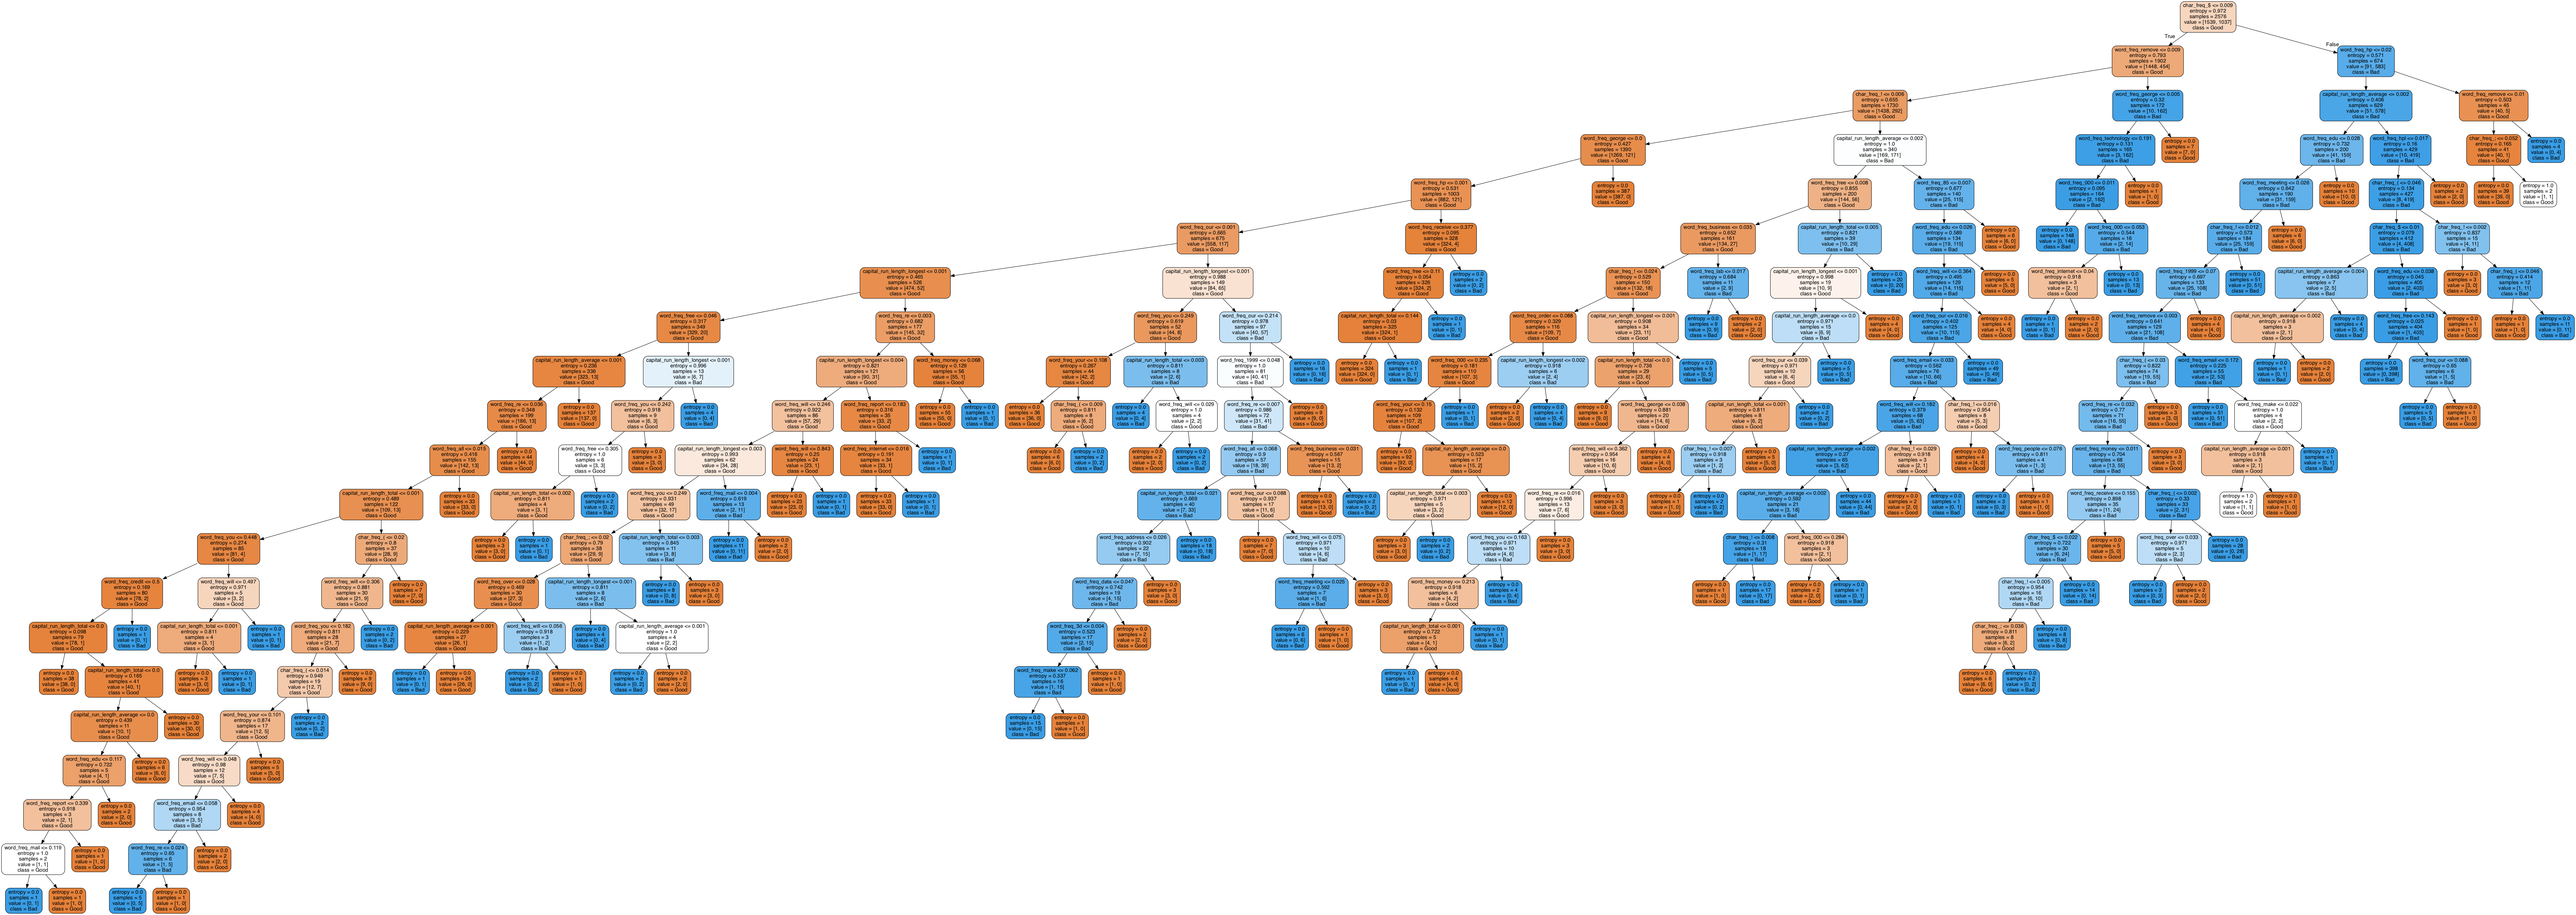

In [57]:
# Show the graph
Image(graph.create_png())

---
**Lets use the test dataset to assess the performance of the model.**

In [58]:
pred_y_dt = dt.predict(test_X_scale) # scaled predictors have optimal performance

In [59]:
metrics.accuracy_score(test_y, pred_y_dt)

0.9208074534161491

In [60]:
metrics.roc_auc_score(test_y, pred_y_dt)

0.91456729159692

In [61]:
ACC = [metrics.accuracy_score(test_y, pred_y_dt)]

AUC = [metrics.roc_auc_score(test_y, pred_y_dt)]

pd.DataFrame({'Accuracy':ACC,'AUC':AUC},
             index = ['Decision Tree Classifier'])

Accuracy       AUC
Decision Tree Classifier  0.920807  0.914567

**From the above DT Classifier result, we can depict that it gives us an AUC score of 91.45% on the test dataset**

---
# 4. Random Forest Classifier

## 4.1 Random Forest with feature importance and without hyper-parameter tuning

Contribution: Viraj

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(n_estimators=7, max_features=9, random_state=123)

In [64]:
#from sklearn.utils import class_weights
#sample = class_weight.compute_sample_weight('balanced', train_y)
#rf.fit(train_X_scale, train_y, sample_weight=sample)

**We did not apply weights to the RF classifier because it did not give similar/ better performance as compared to basic RF classifier.**

In [65]:
# Training RF model without hyper-parameters.
rf.fit(train_X_scale, train_y)

RandomForestClassifier(max_features=9, n_estimators=7, random_state=123)

In [66]:
rf.feature_importances_

array([0.00187079, 0.00673247, 0.0081495 , 0.00048589, 0.03119199,
       0.00833332, 0.11652345, 0.00673671, 0.00561092, 0.00934755,
       0.00675037, 0.01054581, 0.00362518, 0.00047732, 0.00071045,
       0.06868911, 0.01794924, 0.00728571, 0.01963387, 0.00267784,
       0.038014  , 0.0019589 , 0.01974914, 0.08226394, 0.03639794,
       0.00971604, 0.01073205, 0.00389826, 0.00061381, 0.00064607,
       0.00021253, 0.00245185, 0.0020699 , 0.00022224, 0.00181818,
       0.00051796, 0.01138112, 0.0008679 , 0.00162231, 0.00090356,
       0.00094359, 0.0041108 , 0.0002238 , 0.00058938, 0.00613914,
       0.00862618, 0.00016954, 0.00178541, 0.00247461, 0.01635176,
       0.0013449 , 0.11944117, 0.10084462, 0.0024526 , 0.04274395,
       0.06896678, 0.06340658])

In [67]:
# Display of feature importance. Displays the most valuable/ important features
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X_scale.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances.T

char_freq_!  word_freq_remove  char_freq_$  word_freq_money  \
importance     0.119441          0.116523     0.100845         0.082264   

            capital_run_length_longest  word_freq_free  \
importance                    0.068967        0.068689   

            capital_run_length_total  capital_run_length_average  \
importance                  0.063407                    0.042744   

            word_freq_your  word_freq_hp  ...  word_freq_labs  word_freq_lab  \
importance        0.038014      0.036398  ...        0.000646       0.000614   

            word_freq_project  word_freq_technology  word_freq_3d  \
importance           0.000589              0.000518      0.000486   

            word_freq_report  word_freq_original  word_freq_415  \
importance          0.000477            0.000224       0.000222   

            word_freq_telnet  word_freq_table  
importance          0.000213          0.00017  

[1 rows x 57 columns]

<AxesSubplot:title={'center':'Feature Importance of Spam and Not Spam Emails'}>

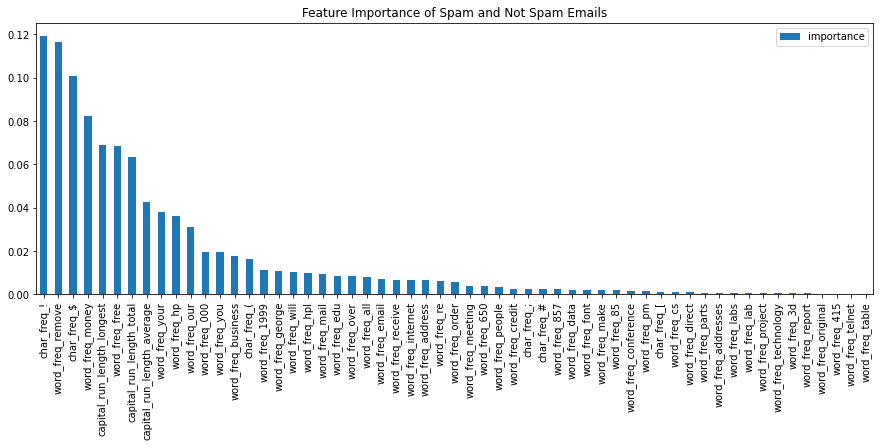

In [68]:
# plotting the important features bar plot.
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of Spam and Not Spam Emails')

**Using test dataset to assess the RF model.**

In [69]:
pred_y_rf = rf.predict(test_X_scale) # scaled predictors have optimal performance

In [70]:
metrics.accuracy_score(test_y, pred_y_rf)

0.9456521739130435

In [71]:
metrics.roc_auc_score(test_y, pred_y_rf)

0.9386926682289922

## 4.2 Random Forest with hyper-parameter tuning

Contribution: Viraj, with additional trials with trimming, balancing, etc by Austin

In [72]:
# n_estimators are the number of trees we want to take before taking maximum voting or avgs of the predictions
# max_features are the maxiumum number of features (predictors) random forest is allowed to try in a individual tree
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators':[100,200,300,400,500,600],
              'max_features':[1,3,5,7,9,13,15,17,20,25,30,40,50,57],
              'random_state':[123]}
parameters

{'criterion': ['gini', 'entropy'],
 'n_estimators': [100, 200, 300, 400, 500, 600],
 'max_features': [1, 3, 5, 7, 9, 13, 15, 17, 20, 25, 30, 40, 50, 57],
 'random_state': [123]}

In [73]:
rf2 = RandomForestClassifier()

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
# GridSearchCV will loop all the hyper-parameters that we have defined i.e. n_estimators and max_features. 
# it will fit the model on the training dataset.

grid_rf = GridSearchCV(rf2, parameters, scoring='roc_auc', cv=10)

**Training the RF model based on hyper-parameters.**

In [76]:
import time
start = time.time()
print('Start time :'+ time.strftime('%m/%d/%Y %H:%M:%S'))

grid_rf.fit(train_X, train_y)

end = time.time()
print('End time :'+ time.strftime('%m/%d/%Y %H:%M:%S'))
print('Execution Time in seconds :'+ str(end - start))

Start time :12/03/2021 18:27:28
End time :12/03/2021 19:54:26
Execution Time in seconds :5218.294886827469


In [77]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_features': 1,
 'n_estimators': 400,
 'random_state': 123}

**Using Test dataset to assess the RF model with hyper-parameters.**

In [78]:
pred_y_rf2 = grid_rf.predict(test_X)

In [79]:
metrics.accuracy_score(test_y, pred_y_rf2)

0.9642857142857143

In [80]:
metrics.roc_auc_score(test_y, pred_y_rf2)

0.9579636759290258

In [81]:
print(metrics.classification_report(test_y, pred_y_rf2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       412
           1       0.96      0.94      0.95       232

    accuracy                           0.96       644
   macro avg       0.96      0.96      0.96       644
weighted avg       0.96      0.96      0.96       644



## 4.3 Comparing both RF models

In [82]:
acc = [metrics.accuracy_score(test_y, pred_y_rf),
      metrics.accuracy_score(test_y, pred_y_rf2)]

AUC = [metrics.roc_auc_score(test_y, pred_y_rf),
      metrics.roc_auc_score(test_y, pred_y_rf2)]

pd.DataFrame({'Accuracy':acc,'AUC':AUC},
             index = ['RF without hyper-parameter tuning','RF with hyper-parameter tuning'])

Accuracy       AUC
RF without hyper-parameter tuning  0.945652  0.938693
RF with hyper-parameter tuning     0.964286  0.957964

**From the above result we can interpret that RF Classifier with hyper-parameters tunning gives us the best performance with an AUC score of 95.79%**

---
## 5. Support Vector Machine

## 5.1 Linear SVC

Contribution: Viraj

In [83]:
from sklearn import svm

In [73]:
svc_linear = svm.SVC(kernel='linear', C=1.0)

In [74]:
svc_linear.fit(train_X, train_y)

SVC(kernel='linear')

In [75]:
pred_y_svc = svc_linear.predict(test_X)

In [76]:
metrics.accuracy_score(test_y, pred_y_svc)

0.9503105590062112

In [77]:
metrics.roc_auc_score(test_y, pred_y_svc)

0.9451581854703716

## 5.2 Tuning Hyper-parameters

Contribution: Viraj

In [84]:
parameters = {'kernel': ['linear'],
             'C':[2,5],
             'gamma':[1,0.1,0.01,0.001]}
parameters

{'kernel': ['linear'], 'C': [2, 5], 'gamma': [1, 0.1, 0.01, 0.001]}

In [85]:
svc = svm.SVC()

In [86]:
grid_svc = model_selection.GridSearchCV(svc, parameters, scoring='accuracy', cv=5)

In [87]:
import time
start = time.time()
print('Start time :'+ time.strftime('%m/%d/%Y %H:%M:%S'))

grid_svc.fit(train_X, train_y)

end = time.time()
print('End time :'+ time.strftime('%m/%d/%Y %H:%M:%S'))
print('Execution Time in seconds :'+ str(end - start))

Start time :12/03/2021 19:59:09
End time :12/03/2021 23:13:55
Execution Time in seconds :11685.597703933716


In [88]:
grid_svc.best_params_

{'C': 5, 'gamma': 1, 'kernel': 'linear'}

In [89]:
#svc_final = svm.SVC(kernel='linear', C=2, gamma=0.001)

In [90]:
#svc_final.fit(train_X, train_y)

In [91]:
#pred_y_svc2 = svc_final.predict(test_X)
pred_y_svc2 = grid_svc.predict(test_X)

In [92]:
metrics.accuracy_score(test_y, pred_y_svc2)

0.9440993788819876

In [93]:
metrics.roc_auc_score(test_y, pred_y_svc2)

0.9403038165383328

## 5.3 Comparing both SVC models

In [98]:
acc = [metrics.accuracy_score(test_y, pred_y_svc),
      metrics.accuracy_score(test_y, pred_y_svc2)]

AUC = [metrics.roc_auc_score(test_y, pred_y_svc),
      metrics.roc_auc_score(test_y, pred_y_svc2)]

pd.DataFrame({'Accuracy':acc,'AUC':AUC},
             index = ['SVC without hyper-parameter tuning','SVC with hyper-parameter tuning'])

Accuracy       AUC
SVC without hyper-parameter tuning  0.950311  0.945158
SVC with hyper-parameter tuning     0.948758  0.944886

**From the above result we can see that SVC with linear kernel and tuned hyper parameters gives us an AUC score of 94.48%**

## 6. Neural Network MLP Classifier

Contribution: Austin

In [18]:
from sklearn import neural_network

In [19]:
# Specify an ANN model, use 3 hidden layers with nodes
classifier1 = neural_network.MLPClassifier(hidden_layer_sizes=(17,15,8), max_iter=2000, activation='relu', solver='adam', alpha=.0001,
                                   random_state=123)
#relu , tanh, logistic, identity
#solver=adam sgd lbfgs

In [20]:
classifier1.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(17, 15, 8), max_iter=2000, random_state=123)

In [21]:
pred_y_classifier1 = classifier1.predict(test_X)

In [24]:
metrics.accuracy_score(test_y, pred_y_classifier1)

0.9565217391304348

In [23]:
metrics.roc_auc_score(test_y, pred_y_classifier1)

0.9500125544024105

In [27]:
ACC = [metrics.accuracy_score(test_y, pred_y_classifier1)]

AUC = [metrics.roc_auc_score(test_y, pred_y_classifier1)]

pd.DataFrame({'Accuracy':ACC,'AUC':AUC},
             index = ['Neural network MLP Classifier'])

Accuracy       AUC
Neural network MLP Classifier  0.956522  0.950013

**From the above results by using NN MLP Classifier we get an AUC score of 95%**

---
Conclusion: From all the selected models on training the dataset, we prefer to choose Random Forest Classifier as the best supervised machine learning model with best hyper parameters; criterion': 'entropy','max_features': 1, 'n_estimators': 400,'random_state': 123. We achieved an overall AUC score of 95.79%. 

---

We choose RF classifier as our ML model to test it performance on the test dataset by importing test_data.csv file in the summary jupyter notebook.

---